## Prepare Environment

In [1]:
import pandas as pd
import numpy as np
url ='https://raw.githubusercontent.com/khwanck/DeepLearning_NIDA01/main/winequality-red.csv'
data=pd.read_csv(url,)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Y
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
x=data.drop('Y',1)
y=data.Y
print(x.head(5))
print(y.head(5))

   fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]
0    5
1    5
2    5
3    6
4    5
Name: Y, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=0)
type(x_train)

pandas.core.frame.DataFrame

In [4]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
x_train = Scaler_X.fit_transform(x_train)
x_test = Scaler_X.transform(x_test)
type(x_train)
type(y_train)

pandas.core.series.Series

In [5]:
#x_train = x_train.to_numpy()
#y_train = y_train.to_numpy()
x_train=x_train.astype(np.float32)
y_train=y_train.astype(np.float32)
input_dim=11   # number of features 
output_dim=11   # number of output (0,1,2,...,10)
type(y_train)

pandas.core.series.Series

In [6]:
import sys
print(f"Python{sys.version}\n")
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 

Python3.7.12 (default, Jan 15 2022, 18:48:18) 
[GCC 7.5.0]



## Model Architecture

In [7]:
from keras.regularizers import l1_l2
model=tf.keras.models.Sequential()
#input layer
model.add(tf.keras.Input(shape=(input_dim)))



ทางกลุ่มได้ทำการปรับในส่วนของ hidden layer โดย:

1. ปรับจำนวนของ hidden layer ตั้งแต่ 1 ถึง 9 
2. ปรับจำนวน node ในแต่ละ hidden layer ตั้งแต่ 10, 20, 50, 100, 200, 300 และ 1000 (ทุก hidden layer ใช้จำนวน node เท่ากันหมด)
3. ปรับ activation function โดยลองใช้ Relu, sigmoid, Tanh (ในการปรับแต่ละรอบจะใช้ activation function เดียวกันสำหรับทุก hidden layer)
4. ลองใส่ Regularization เพิ่ม

In [8]:

#hidden layer
model.add(tf.keras.layers.Dense(300,activation='relu',name='Hidden1'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN1'))
model.add(tf.keras.layers.Dense(300,activation='relu',name='Hidden2'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN2'))
model.add(tf.keras.layers.Dense(300,activation='relu',name='Hidden3'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN3'))
model.add(tf.keras.layers.Dense(300,activation='relu',name='Hidden4'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN4'))
model.add(tf.keras.layers.Dense(300,activation='relu',name='Hidden5'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN5'))
model.add(tf.keras.layers.Dense(300,activation='relu',name='Hidden6'))
model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN6'))



#model.add(tf.keras.layers.Dense(300,activation='relu',kernel_regularizer=l1_l2(l1 =0.001,l2=0.001),name='Hidden1'))
#model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN1'))
#model.add(tf.keras.layers.Dense(300,activation='relu',kernel_regularizer=l1_l2(l1 =0.001,l2=0.001),name='Hidden2'))
#model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN2'))
#model.add(tf.keras.layers.Dense(300,activation='relu',kernel_regularizer=l1_l2(l1 =0.001,l2=0.001),name='Hidden3'))
#model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN3'))
#model.add(tf.keras.layers.Dense(300,activation='relu',kernel_regularizer=l1_l2(l1 =0.001,l2=0.001),name='Hidden4'))
#model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN4'))
#model.add(tf.keras.layers.Dense(300,activation='relu',kernel_regularizer=l1_l2(l1 =0.001,l2=0.001),name='Hidden5'))
#model.add(tf.keras.layers.BatchNormalization(axis=-1,name='BN5'))
#model.add(tf.keras.layers.Dense(300,activation='relu',kernel_regularizer=l1_l2(l1 =0.001,l2=0.001),name='Hidden6'))

model.add(tf.keras.layers.Dropout(0.2))

In [9]:
#output layer
model.add(tf.keras.layers.Dense(output_dim,activation='softmax',name='output'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden1 (Dense)             (None, 300)               3600      
                                                                 
 BN1 (BatchNormalization)    (None, 300)               1200      
                                                                 
 Hidden2 (Dense)             (None, 300)               90300     
                                                                 
 BN2 (BatchNormalization)    (None, 300)               1200      
                                                                 
 Hidden3 (Dense)             (None, 300)               90300     
                                                                 
 BN3 (BatchNormalization)    (None, 300)               1200      
                                                                 
 Hidden4 (Dense)             (None, 300)               9

- Optimizer ไม่ได้มีการปรับแก้

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])


- Batch size และ Epoch ทางกลุ่มไม่ได้ปรับจูนค่า
- Validation Split ratio ได้ลองปรับตั้งแต่ 0.1 - 0.9

In [11]:
history=model.fit(x_train,y_train,batch_size=100,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
10/10 [==============================] - 4s 51ms/step - loss: 2.5172 - acc: 0.3629 - val_loss: 2.2537 - val_acc: 0.5125
Epoch 2/20
10/10 [==============================] - 0s 14ms/step - loss: 1.6180 - acc: 0.5954 - val_loss: 2.0847 - val_acc: 0.5458
Epoch 3/20
10/10 [==============================] - 0s 13ms/step - loss: 1.1747 - acc: 0.7007 - val_loss: 1.9093 - val_acc: 0.5750
Epoch 4/20
10/10 [==============================] - 0s 15ms/step - loss: 0.8557 - acc: 0.7737 - val_loss: 1.7533 - val_acc: 0.4708
Epoch 5/20
10/10 [==============================] - 0s 12ms/step - loss: 0.7528 - acc: 0.8050 - val_loss: 1.6527 - val_acc: 0.4750
Epoch 6/20
10/10 [==============================] - 0s 16ms/step - loss: 0.5926 - acc: 0.8311 - val_loss: 1.5063 - val_acc: 0.5750
Epoch 7/20
10/10 [==============================] - 0s 14ms/step - loss: 0.5343 - acc: 0.8436 - val_loss: 1.3999 - val_acc: 0.5708
Epoch 8/20
10/10 [==============================] - 0s 12ms/step - loss: 0.4043 - a

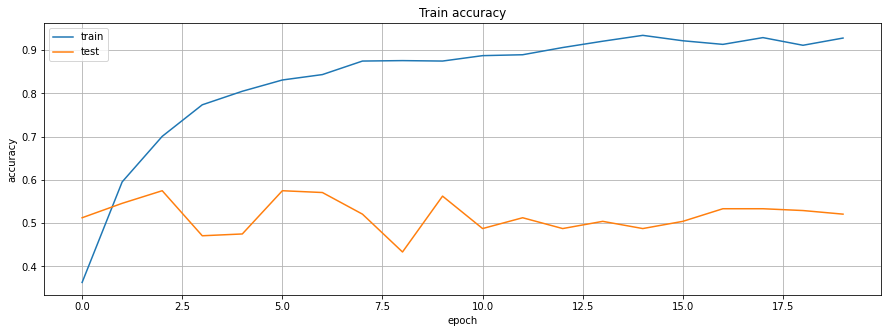

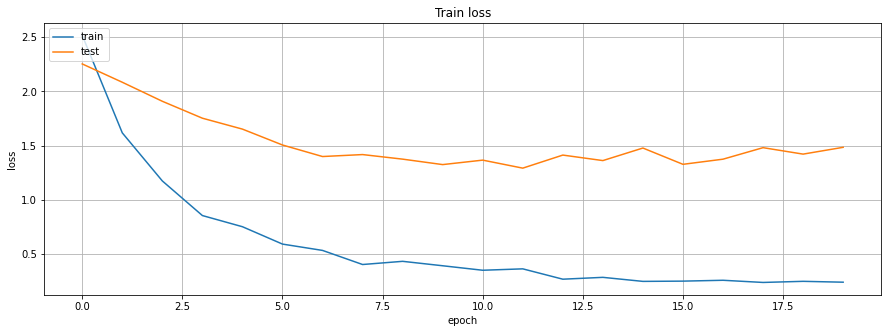

In [12]:
# Summarize history for accuracy
plt.figure(figsize=(15,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

# Summarize history for loss
plt.figure(figsize=(15,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

In [13]:
results = model.evaluate(x_test, y_test, batch_size=128)
print(f"{model.metrics_names} = {results}")

4/4 [==============================] - 0s 5ms/step - loss: 1.3309 - acc: 0.5750
['loss', 'acc'] = [1.3309420347213745, 0.574999988079071]


In [14]:
# Test using the model on x_test[i]
i = 1
y_pred = model.predict(x_test[i].reshape(1,-1)) # reshape x_test[i] from (n_feature,) to (1, n_feature)

print(f"{'#'*10} Input: x_test[{i}] {'#'*10}")
print(f"shape={x_test[i].shape}\nvalue={x_test[i]}\n")

print(f"{'#'*10} Ground truth: y_test[{i}] {'#'*10}")
print(f"shape={y_test[i].shape}\nvalue={y_test[i]}\n")

print(f"{'#'*10} Prediction: y_pred {'#'*10}")
print(f"type={type(y_pred)}\ndtype={y_pred.dtype}\nshape={y_pred.shape}")
print(f"value={y_pred}")
print(f"np.argmax(y_pred)={np.argmax(y_pred)}")

########## Input: x_test[1] ##########
shape=(11,)
value=[-0.13713469  1.57906477 -1.39354657  1.04393471  0.16155451 -1.04907196
 -0.98199091  0.94818221  0.3314596  -0.72822233 -0.75660071]

########## Ground truth: y_test[1] ##########
shape=()
value=5

########## Prediction: y_pred ##########
type=<class 'numpy.ndarray'>
dtype=float32
shape=(1, 11)
value=[[0.00274548 0.00170341 0.00469704 0.00690073 0.00542815 0.82894325
  0.13930133 0.00092094 0.00192882 0.00320826 0.00422265]]
np.argmax(y_pred)=5


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
y_prediction = np.argmax(y_pred, axis=1)
print('acuracy_test', accuracy_score(y_test,y_prediction))
print(classification_report(y_test, y_prediction))

acuracy_test 0.575
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        14
           5       0.57      0.85      0.68       169
           6       0.58      0.50      0.54       170
           7       0.50      0.03      0.05        40
           8       0.00      0.00      0.00         5

    accuracy                           0.57       400
   macro avg       0.28      0.23      0.21       400
weighted avg       0.54      0.57      0.52       400



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
